KNN FOR JOB PLACEMENT

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [2]:
file_path = "C:\\Users\\N I T R O\\jupyternotebook\\jobplacement.csv"
job_df = pd.read_csv(file_path)

# Preview the first few rows
job_df.head()


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [3]:

# Fill numeric columns with their means
numeric_cols = job_df.select_dtypes(include='number').columns
job_df[numeric_cols] = job_df[numeric_cols].fillna(job_df[numeric_cols].mean())

# Fill other columns with 'Unknown'
job_df = job_df.fillna('Unknown')

# Inspect updated dataset
job_df.head()


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
job_df.shape

(215, 13)

In [5]:
job_df = pd.get_dummies(job_df, columns=['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation'])

# Update features after encoding
X = job_df.drop(columns=['status'])
print("Shape of job_df after loading:", job_df.shape)

Shape of job_df after loading: (215, 22)


In [6]:
y = job_df['status'].map({'Placed': 1, 'Not Placed': 0})


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X_train.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_F,gender_M,ssc_board_Central,ssc_board_Others,hsc_board_Central,...,hsc_subject_Arts,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Comm&Mgmt,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_No,work_experience_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
93,52.0,62.0,54.0,72.00,55.41,False,True,True,False,True,...,False,True,False,True,False,False,True,False,False,True
84,70.0,63.0,70.0,55.00,62.00,False,True,True,False,False,...,False,False,True,False,False,True,False,True,True,False
95,73.0,78.0,65.0,95.46,62.16,False,True,True,False,False,...,False,True,False,True,False,False,False,True,True,False
137,67.0,63.0,72.0,56.00,60.41,False,True,False,True,True,...,False,True,False,True,False,False,True,False,False,True
210,80.6,82.0,77.6,91.00,74.49,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [10]:
X_train

array([[-1.39473047, -0.35425688, -1.60185427, ..., -0.70402569,
        -1.13724814,  1.13724814],
       [ 0.26292848, -0.26697149,  0.51788903, ...,  1.42040271,
         0.87931557, -0.87931557],
       [ 0.53920498,  1.04230932, -0.14453075, ...,  1.42040271,
         0.87931557, -0.87931557],
       ...,
       [-0.63681196,  0.25674083, -0.0120468 , ..., -0.70402569,
         0.87931557, -0.87931557],
       [ 0.98124736, -0.17968611, -0.25051792, ..., -0.70402569,
        -1.13724814,  1.13724814],
       [ 0.90757363, -0.44154227,  0.25292111, ...,  1.42040271,
         0.87931557, -0.87931557]])

In [11]:
X_train.shape

(172, 21)

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [13]:
# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 0.7906976744186046


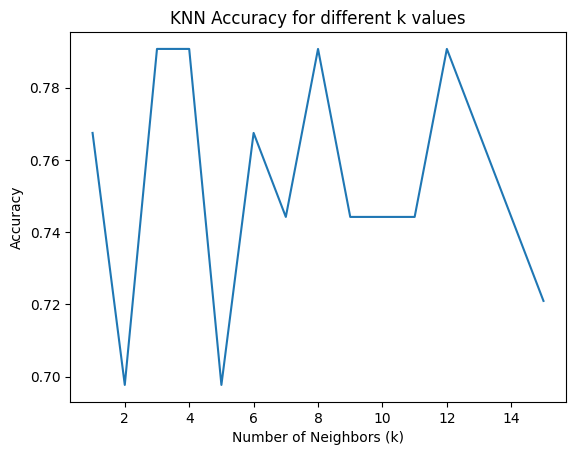

In [14]:
scores = []
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 16), scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.show()


In [15]:
# Predicting for a new student 
new_student = { 'ssc_percentage': 75.0, 'hsc_percentage': 82.0, 'degree_percentage': 70.0, 'emp_test_percentage': 80.0, 'mba_percent': 65.0, 'gender': 'M', 'ssc_board': 'Central', 'hsc_board': 'Central', 'hsc_subject': 'Science', 'undergrad_degree': 'Sci&Tech', 'work_experience': 'Yes', 'specialisation': 'Mkt&Fin' }

In [16]:
new_student_df = pd.DataFrame([new_student])

In [17]:
new_student_df = pd.get_dummies(new_student_df, columns=['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation'])

In [19]:
# Ensure the new student data has the same columns as the training data
for col in X.columns:
    if col not in new_student_df.columns:
        new_student_df[col] = 0


In [20]:
new_student_df = new_student_df[X.columns]

In [21]:
new_student_scaled = scaler.transform(new_student_df)

In [22]:
# Make the prediction 
new_prediction = knn.predict(new_student_scaled)
print("Prediction for the new student:", "Placed" if new_prediction[0] == 1 else "Not Placed")

Prediction for the new student: Placed
